## Import Data

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
data_path = os.path.join('datasets', 'CarPrice_Assignment.csv')
cars = pd.read_csv(data_path)

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


It seems that we have no null value

## Data Cleaning

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cars = cars.drop('car_ID', axis=1)

In [8]:
cars['CarName'] = cars['CarName'].str.split(' ', expand=True)

In [9]:
cars['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
cars['CarName'] = cars['CarName'].replace({'maxda': 'mazda',
                                           'Nissan': 'nissan',
                                           'porcshce': 'porsche',
                                           'vokswagen': 'volkswagen',
                                           'vw': 'volkswagen',
                                           'toyouta': 'toyota'
                                          })

In [11]:
cars['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [12]:
cars['doornumber'] = cars['doornumber'].replace({'two': 2, 'four': 4})

In [13]:
cars['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [14]:
cars['cylindernumber'] = cars['cylindernumber'].replace({'four': 4,
                                                         'six': 6,
                                                         'five': 5,
                                                         'three': 3,
                                                         'twelve': 12,
                                                         'two': 2,
                                                         'eight': 8
                                                        })

In [15]:
cat_col = cars.select_dtypes(include=['object']).columns
num_col = cars.select_dtypes(exclude=['object']).columns

## Data Visualization

Text(0, 0.5, 'Count of Cars')

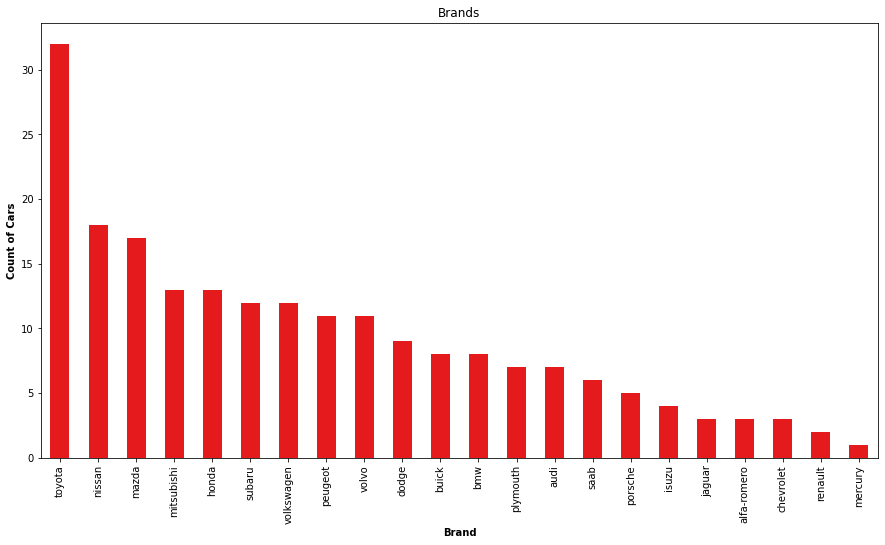

In [16]:
plt.rcParams['figure.figsize'] = [15, 8]
ax = cars['CarName'].value_counts().plot(kind='bar', stacked=True, colormap='Set1')
ax.title.set_text('Brands')
plt.xlabel('Brand', fontweight='bold')
plt.ylabel('Count of Cars', fontweight='bold')

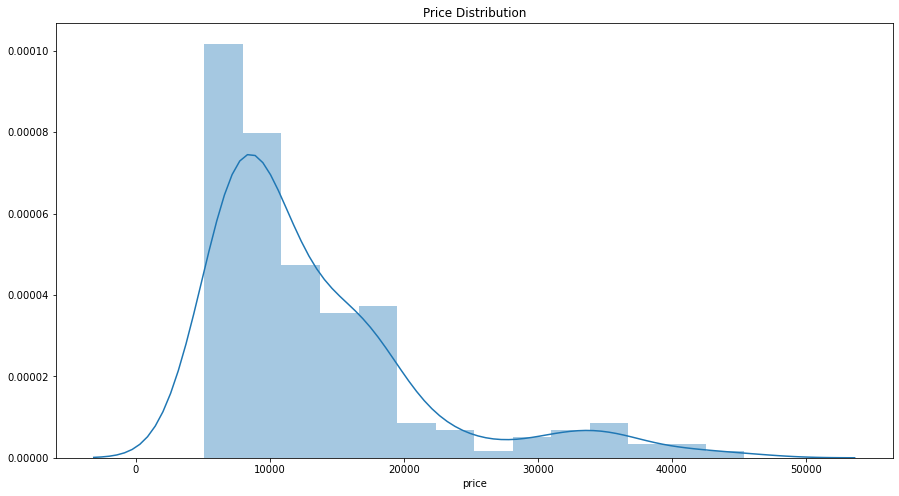

In [17]:
plt.figure(figsize=(15,8))
plt.title('Price Distribution')
sns.distplot(cars['price'])

### Visualising Numeric Variables

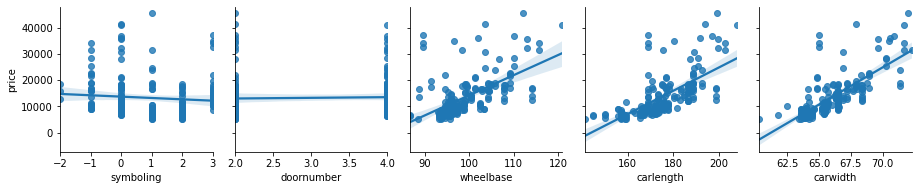

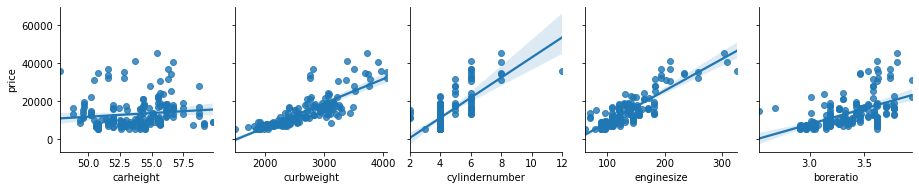

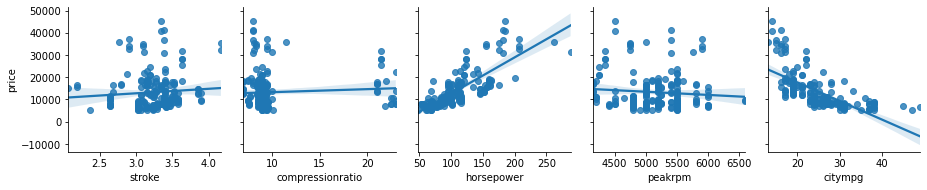

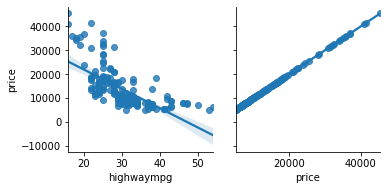

In [18]:
for i in range(0,4):
    batch=5*i
    sns.pairplot(
        data=cars,
        y_vars=['price'],
        x_vars=num_col[0+batch:5+batch],
        kind="reg"
    )

In [19]:
corr = cars[num_col].corr()
corr['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

- Relevant positive correlation: 
    - enginesize 
    - curbweight 
    - horsepower 
    - carwidth 
    - cylindernumber 
    - carlength
    - wheelbase
    - boreratio
    
- Relevant negative correlation: 
    - citympg
    - highwaympg

In [20]:
num_col_rel = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'cylindernumber', 'carlength', 'wheelbase', 'boreratio', 'price']
num_col_rel

['enginesize',
 'curbweight',
 'horsepower',
 'carwidth',
 'cylindernumber',
 'carlength',
 'wheelbase',
 'boreratio',
 'price']

### Visualising Categorical Variables

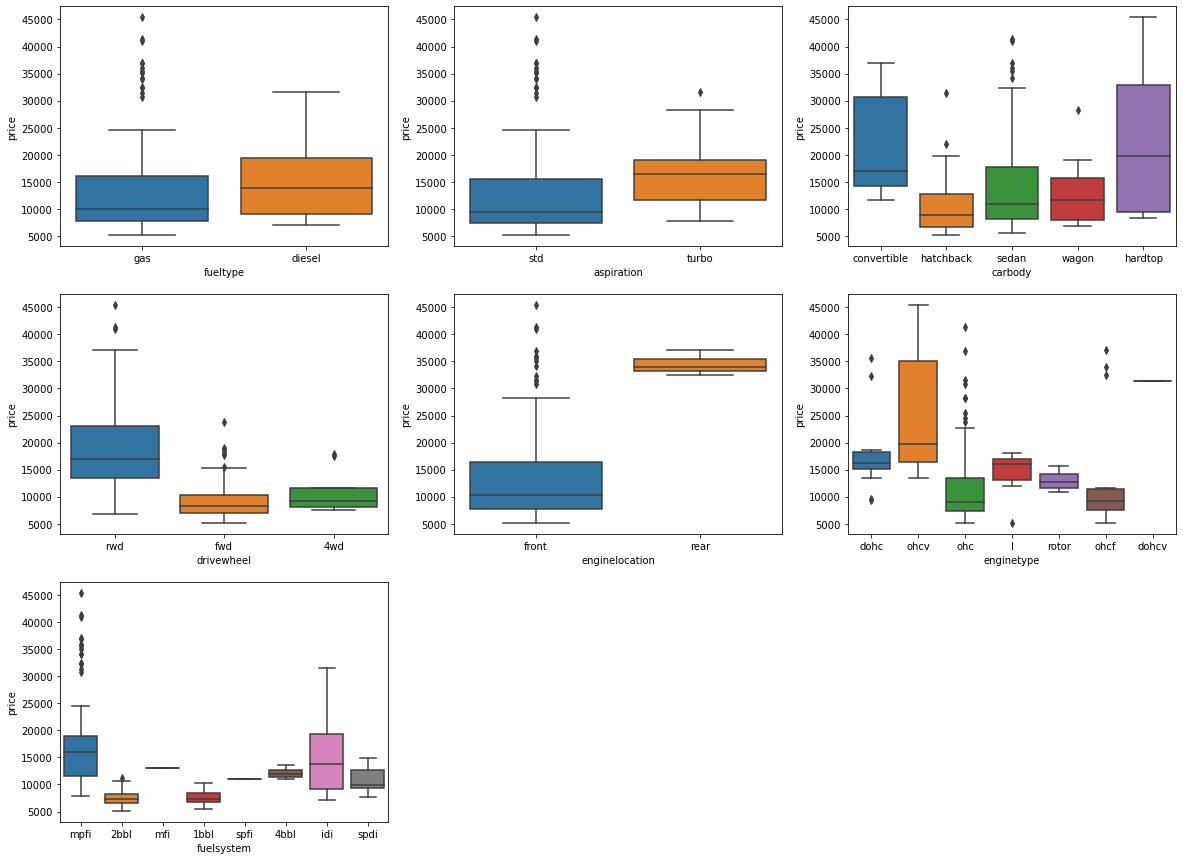

In [21]:
plt.figure(figsize=(20,15))

for i in range(1, len(cat_col)):
    plt.subplot(3,3,i)
    sns.boxplot(data=cars, x=cat_col[i], y='price')
    
plt.show()

All the categorical variables impact on the price

In [22]:
num_col_rel.extend(cat_col)
columns = num_col_rel
columns

['enginesize',
 'curbweight',
 'horsepower',
 'carwidth',
 'cylindernumber',
 'carlength',
 'wheelbase',
 'boreratio',
 'price',
 'CarName',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

In [23]:
cars = cars[columns]

## Create Sets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_set, test_set = train_test_split(cars, test_size=0.2, random_state=42)

## Prepare Data

In [26]:
train_set.head()

,enginesize,curbweight,horsepower,carwidth,cylindernumber,carlength,wheelbase,boreratio,price,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
66,134,2700,72,66.1,4,175.0,104.9,3.43,18344.0,mazda,diesel,std,sedan,rwd,front,ohc,idi
111,120,3075,95,68.4,4,186.7,107.9,3.46,15580.0,peugeot,gas,std,sedan,rwd,front,l,mpfi
153,92,2280,62,63.6,4,169.7,95.7,3.05,6918.0,toyota,gas,std,wagon,fwd,front,ohc,2bbl
96,97,1971,69,63.8,4,165.3,94.5,3.15,7499.0,nissan,gas,std,sedan,fwd,front,ohc,2bbl
38,110,2289,86,65.2,4,167.5,96.5,3.15,9095.0,honda,gas,std,hatchback,fwd,front,ohc,1bbl


In [27]:
cars_data = train_set.drop('price', axis=1)
cars_label = train_set['price']

In [28]:
cars_data.head()

,enginesize,curbweight,horsepower,carwidth,cylindernumber,carlength,wheelbase,boreratio,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
66,134,2700,72,66.1,4,175.0,104.9,3.43,mazda,diesel,std,sedan,rwd,front,ohc,idi
111,120,3075,95,68.4,4,186.7,107.9,3.46,peugeot,gas,std,sedan,rwd,front,l,mpfi
153,92,2280,62,63.6,4,169.7,95.7,3.05,toyota,gas,std,wagon,fwd,front,ohc,2bbl
96,97,1971,69,63.8,4,165.3,94.5,3.15,nissan,gas,std,sedan,fwd,front,ohc,2bbl
38,110,2289,86,65.2,4,167.5,96.5,3.15,honda,gas,std,hatchback,fwd,front,ohc,1bbl


In [29]:
cars_label.head()

66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
Name: price, dtype: float64

### Pipelines

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [31]:
cat_col = cars_data.select_dtypes(include=['object']).columns
num_col = cars_data.select_dtypes(exclude=['object']).columns

In [32]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [33]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_col),
    ('cat', OneHotEncoder(drop='first'), cat_col)
])

In [34]:
cars_prepared = full_pipeline.fit_transform(cars_data)

## Select and Train a Model

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
test_data = test_set.drop('price', axis=1)
test_prepared = full_pipeline.transform(test_data)
test_labels = test_set['price']

In [37]:
def display_scores(model):
    predictions = model.predict(test_prepared)
    mse = mean_squared_error(test_labels,predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(test_labels, predictions)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2:', r2)

### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, cars_label)

LinearRegression()

In [40]:
display_scores(lin_reg)

MSE: 9008661.933765935
RMSE: 3001.4433084377815
R2: 0.8858854434650758


### Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
forest_reg = RandomForestRegressor()
forest_reg.fit(cars_prepared, cars_label)

RandomForestRegressor()

In [43]:
display_scores(forest_reg)

MSE: 3629888.887160409
RMSE: 1905.2267285445082
R2: 0.9540194577535668


### XGBRegressor

In [44]:
from xgboost import XGBRegressor

In [45]:
xg_reg = XGBRegressor()
xg_reg.fit(cars_prepared, cars_label)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
display_scores(xg_reg)

MSE: 5912663.16781194
RMSE: 2431.596834965028
R2: 0.9251030907479971


### Grid Search Random Forest Regressor

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = [
    {'n_estimators': np.arange(10, 200, 10), 'max_features': np.arange(2, 200, 2)},
    {'bootstrap': [False], 'n_estimators': np.arange(10, 200, 10), 'max_features': np.arange(2, 200, 2)}
]

forest_reg_grid = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg_grid, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)

In [49]:
grid_search.fit(cars_prepared, cars_label)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
       132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 1...
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
       132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156,
       158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182,
       184, 186, 188, 190, 192, 194, 196, 198]),
                          'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 15

In [50]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=70)

In [51]:
forest_best_estimator = grid_search.best_estimator_

In [52]:
display_scores(forest_best_estimator)

MSE: 4017210.1245458736
RMSE: 2004.297913122167
R2: 0.9491131807097879


### Grid Search XGBRegressor

In [53]:
param_grid = [
    {'n_estimators': np.arange(10, 200, 10), 'max_depth': np.arange(5, 10, 1)},
]

xgb_reg_grid = XGBRegressor()
grid_search = GridSearchCV(xgb_reg_grid, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)

In [54]:
grid_search.fit(cars_prepared, cars_label)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [55]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
xgb_best_estimator = grid_search.best_estimator_

In [57]:
display_scores(xgb_best_estimator)

MSE: 5551906.710163218
RMSE: 2356.248439821917
R2: 0.9296728663133773


## Conclusion

The best model obtained is the RandomForestRegressor with its default values.

In [58]:
display_scores(forest_reg)

MSE: 3629888.887160409
RMSE: 1905.2267285445082
R2: 0.9540194577535668


## Save Best Model

In [59]:
import joblib

In [60]:
joblib.dump(forest_reg, 'car_price_estimator.pkl')

['car_price_estimator.pkl']